
# Depth contour visualization 

Contour visualization with different depth notions w.r.t. a dataset.


In [1]:
from depth.model.DepthEucl import DepthEucl 
import numpy as np
from matplotlib import pyplot as plt
from depth.plotDepth import depth_mesh, depth_plot2d

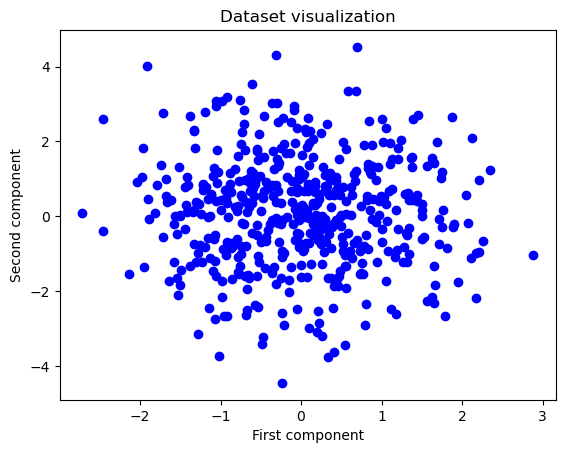

In [2]:
np.random.seed(2801)
mat1=[[1, 0],[0, 2]]
dataset = np.random.multivariate_normal([0,0], mat1, 500)
model=DepthEucl().load_dataset(dataset)
## visualize points
fig=plt.figure()
plt.scatter(dataset[:,0],dataset[:,1], c="blue",)
plt.xlabel("First component")
plt.ylabel("Second component")
plt.title("Dataset visualization")
plt.show()

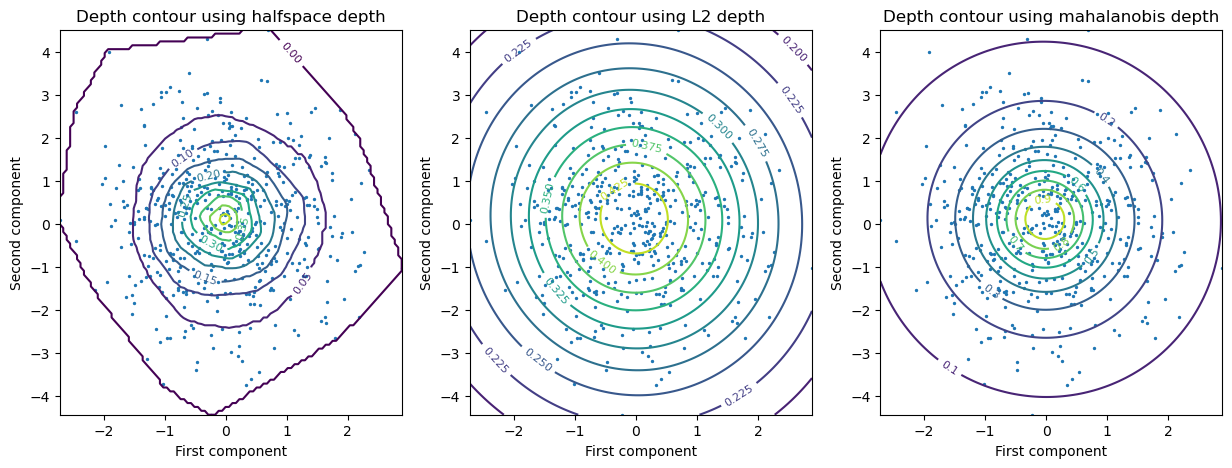

In [3]:
fig, ax = plt.subplots(1,3,figsize=(15,5))
for ind,notion in enumerate(["halfspace","L2","mahalanobis"]):
    xs,ys,depth=depth_mesh(model=model,notion=notion,)
    ax[ind].scatter(dataset[:,0],dataset[:,1],s=2)
    contours =ax[ind].contour(xs,ys,depth,10,)
    ax[ind].clabel(contours, inline=True, fontsize=8)
    ax[ind].set_xlabel("First component")
    ax[ind].set_ylabel("Second component")
    ax[ind].set_title(f"Depth contour using {notion} depth")
plt.show()

modify dataset



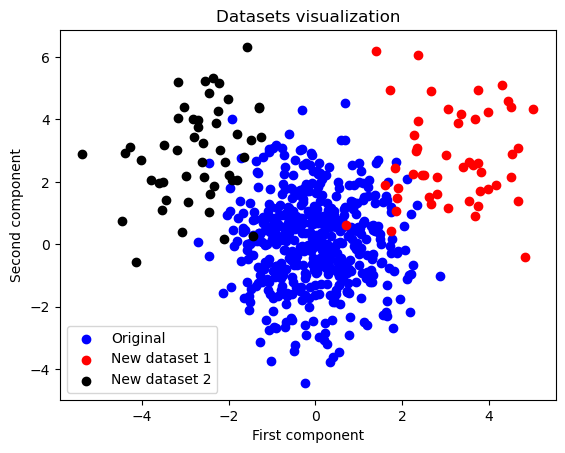

In [4]:
dataset1 = np.random.multivariate_normal([3,3], mat1, 50)
dataset2 = np.random.multivariate_normal([-3,3], mat1, 50)
## visualize points
fig=plt.figure()
plt.scatter(dataset[:,0],dataset[:,1], c="blue",label="Original")
plt.scatter(dataset1[:,0],dataset1[:,1], c="red",label="New dataset 1")
plt.scatter(dataset2[:,0],dataset2[:,1], c="black",label="New dataset 2")
plt.xlabel("First component")
plt.ylabel("Second component")
plt.title("Datasets visualization")
plt.legend()
plt.show()

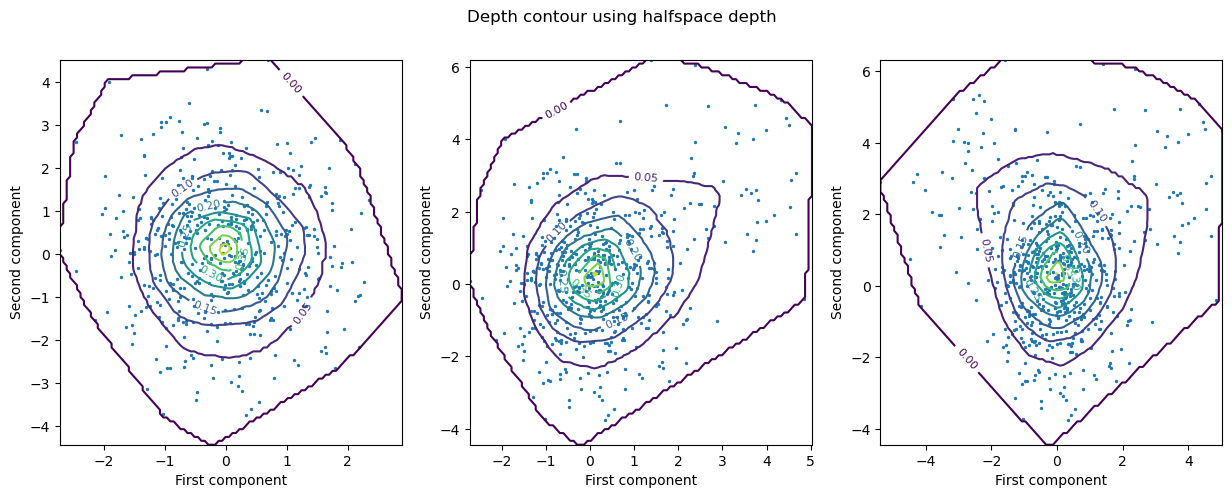

In [5]:
fig, ax = plt.subplots(1,3,figsize=(15,5))
for ind,DS in enumerate([None,dataset1,dataset2]):
    if ind>0:
        model.change_dataset(DS,keepOld=True)
    xs,ys,depth=depth_mesh(model=model,notion="halfspace",)
    ax[ind].scatter(model.data[:,0],model.data[:,1],s=2)
    contours =ax[ind].contour(xs,ys,depth,10,)
    ax[ind].clabel(contours, inline=True, fontsize=8)
    ax[ind].set_xlabel("First component")
    ax[ind].set_ylabel("Second component")
plt.suptitle(f"Depth contour using halfspace depth")
plt.show()